In [1]:
using PyPlot;
using Random;
using Statistics;
using LinearAlgebra;

In [2]:
include("src/utils.jl")

parametric2ellipse_coords (generic function with 1 method)

# Problem 17.1 #

The standard portfolio optimization problem minimizes the risk for a fixed average return. Mathematically, it is stated as 

$$
\begin{align*}
    \text{minimize}& \quad ||R\omega - \rho \mathbf{1}||^2\\
    \text{subject to}& \quad 
    \begin{bmatrix}
        \mathbf{1}^T\\
        \mu^T
    \end{bmatrix}\omega = 
    \begin{bmatrix}
    \mathbf{1}\\
    \rho
    \end{bmatrix}
\end{align*}$$

where $R\in\mathbf{R}^{T\times n}$ is the matrix of returns in each period, $\omega\in\mathbf{R}^n$ is the asset allocation and $\rho \in \mathbf{R}$ is fixed value of the return.
The objective can be expanded to 

$$
\begin{align*}
||R\omega - \rho \mathbf{1}||^2 &= \omega^TR^TR\omega - 2\rho \mathbf{1}^TR\omega + \rho^2 n\\
&= \omega^TR^TR\omega - 2\rho (T\mu^T)\omega + \rho^2 n\\
&= \omega^TR^TR\omega - 2 T\rho^2 + \rho n^2 \quad // \mu^T\omega = \rho\\
\end{align*}$$

Where the last line uses the second constraint that our average return must be $\rho$. Since the last two terms of the objective do not depend on $\omega$ we can drop them from the objective, giving us the equivalent least squares problem

$$
\begin{align*}
    \text{minimize}& \quad ||R\omega||^2\\
    \text{subject to}& \quad 
    \begin{bmatrix}
        \mathbf{1}^T\\
        \mu^T
    \end{bmatrix}\omega = 
    \begin{bmatrix}
    \mathbf{1}\\
    \rho
    \end{bmatrix}
\end{align*}
$$


# Problem 17.2 #

The Markowitz portfolio optimization problem is given by 

$$
\begin{align*}
\text{minimize}&\quad \omega^T \Sigma \omega\\
\text{subject to}&\quad \begin{bmatrix}
        \mathbf{1}^T\\
        \mu^T
    \end{bmatrix}\omega = 
    \begin{bmatrix}
    \mathbf{1}\\
    \rho
    \end{bmatrix}
\end{align*}$$

where $\Sigma = \frac{1}{T} (R - \mathbf{1}\mu^T)^T(R-\mathbf{1}\mu^T)$ is portfolio _covariance matrix_. Expanding the objective we have 

$$
\begin{align*}
\Sigma &= \frac{1}{T} (R - \mathbf{1}\mu^T)^T(R-\mathbf{1}\mu^T)\\
&= \omega^T\left[\frac{1}{T}(R^TR - R^T\mathbf{1}\mu^T - \mu\mathbf{1}^TR+\mu\mathbf{1}^T\mathbf{1}\mu^T)\right]\omega\\
& = \frac{1}{T}(\omega^TR^TR\omega - \omega^TR^T\mathbf{1}\mu^T\omega - \omega^T\mu\mathbf{1}^TR\omega+\omega^T\mu\cdot T\cdot \mu^T\omega)\\
\end{align*}$$

Now using the constraint that $\mu^T\omega = \rho$ and the definition $\mu =\frac{1}{T}R^T\mathbf{1}$ we have

$$
\begin{align*}
\Sigma &= \frac{1}{T}(\omega^TR^TR\omega - \rho\omega^T(T\mu) - \rho(T\mu^T)\omega+ T\rho^2)\\
&= \frac{1}{T}(\omega^TR^TR\omega - \rho^2T)
\end{align*}
$$

This objective is clearly equivalent to $||R\omega||^2$ presented in 17.2

# Problem 17.3 #

The two variable portfolio optimization problem can be formulated as 

$$
\begin{align*}
    \text{minimize}& \quad ||R\omega - \rho \mathbf{1}||^2\\
    \text{subject to}& \quad \omega_1 + \omega_2 = 1\\
    &\quad \mu_1\omega_1 + \mu_2\omega_2 = \rho
\end{align*}$$

Since there are only 2 variables and 2 constraints ($\mu_1 \ne \mu_2$), this is simply a feasability problem and any feasible point will minimize the objective. First we observe that $\omega_1 = 1 - \omega_2$. Plugging into the second constraint gives

$$
\begin{align*}
\mu_1 (1-\omega_2) + \mu_2 \omega_2 &= \rho\\
\implies \omega_2(\mu_2 - \mu_1) &= \rho - \mu_1\\
\implies \omega_2^\star &= \frac{\rho - \mu_1}{\mu_2 - \mu_1}
\end{align*}$$

Plugging back into the first equation we have $\omega_1^\star = \frac{\mu_2 - \rho}{\mu_2 - \mu_1}$

# Problem 17.4 #

The index tracking problem can be formulated as 

$$
\begin{align*}
    \text{minimize}& \quad ||R\omega - r^{tar}||^2\\
    \text{subject to}& \quad 
    \mathbf{1}^T\omega = 
    1
\end{align*}$$

This is of course a linearly constrained least squares problem which which can be solved by solving the linear system given by the KKT conditions

$$
\begin{align*}
\begin{bmatrix} 
2R^TR & \mathbf{1}\\
\mathbf{1}^T & 0
\end{bmatrix}
\begin{bmatrix}
\omega\\
z
\end{bmatrix}=
\begin{bmatrix}
2A^Tr^{tar}\\
1
\end{bmatrix}
\end{align*}$$

The solution of which is 

$$
\begin{align*}
\begin{bmatrix}
\omega^\star\\
z^\star
\end{bmatrix}=
\begin{bmatrix} 
2R^TR & \mathbf{1}\\
\mathbf{1}^T & 0
\end{bmatrix}^{-1}
\begin{bmatrix}
2A^Tr^{tar}\\
1
\end{bmatrix}
\end{align*}$$

# Problem 17.6 #

In [3]:
A = [0.99 0.03 -0.02 -0.32;
    0.01 0.47 4.7 0.00;
    0.02 -0.06 0.4 0.00;
    0.01 -0.04 0.72 0.99];

B = [0.01 0.99;
    -3.44 1.66;
    -0.83 0.44;
    -0.47 0.25];

n = size(A,2);
m = size(B,2);

## Part A ##

Open loop trajectory

In [4]:
T = 120;
xinit = [0;0;0;1.0];
U = zeros(m, T - 1);

X = propagate_linear_dyanmical_system(A, B, U, xinit);

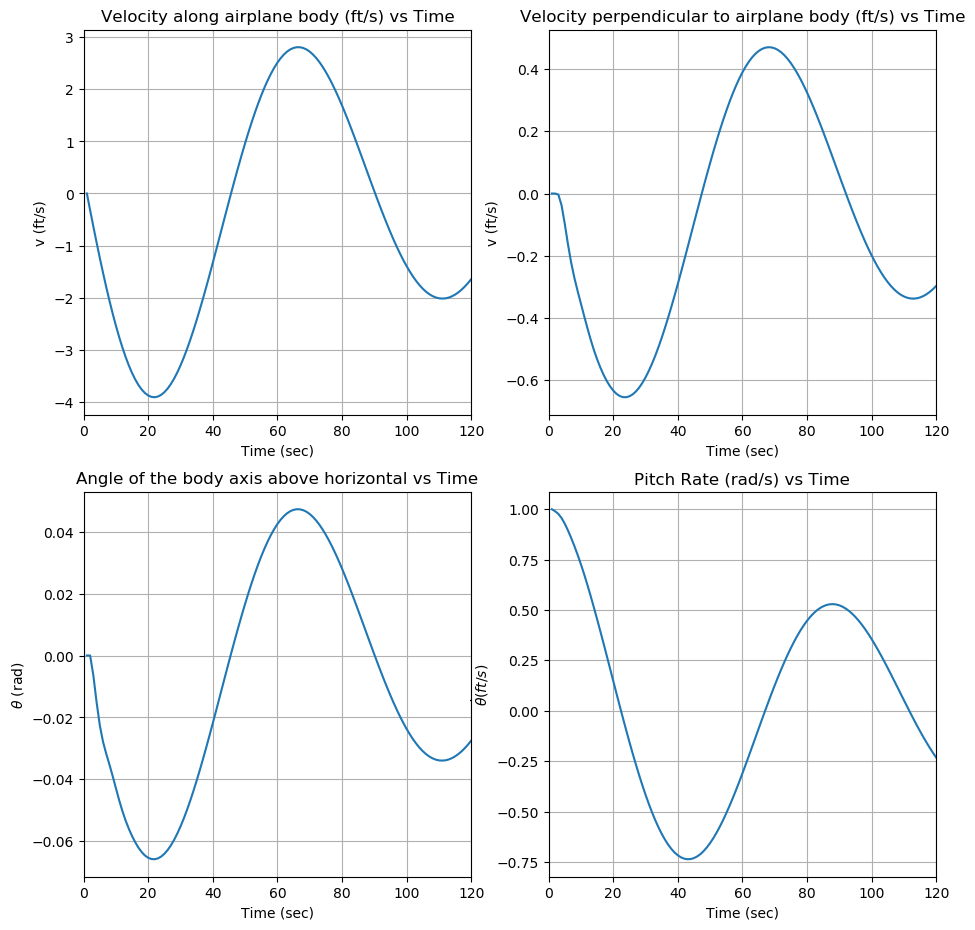

In [5]:
figure(figsize=(11,11));

subplot(221);

time_steps = size(X, 2);

plot(1:time_steps, X[1,:]);
title("Velocity along airplane body (ft/s) vs Time");
xlabel("Time (sec)");
ylabel("v (ft/s)");
xlim([0,T]);

grid(true, which="major");
grid(true, which="minor",linestyle="--");

subplot(222);

plot(1:time_steps, X[2,:])
title("Velocity perpendicular to airplane body (ft/s) vs Time");
xlabel("Time (sec)");
ylabel("v (ft/s)");
xlim([0,T]);

grid(true, which="major");
grid(true, which="minor",linestyle="--");

subplot(223);

plot(1:time_steps, X[3,:])
title("Angle of the body axis above horizontal vs Time");
xlabel("Time (sec)");
ylabel(L"$\theta$ (rad)");
xlim([0,T]);

grid(true, which="major");
grid(true, which="minor",linestyle="--");

subplot(224);

plot(1:time_steps, X[4,:])

title("Pitch Rate (rad/s) vs Time");
xlabel("Time (sec)");
ylabel(L"\dot{\theta}(ft/s)");
grid(true, which="major");
grid(true, which="minor",linestyle="--");

xlim([0,T]);

## Part B ##

Linear Quadratic Control

In [6]:
rho = 100;
T = 100;
C = Matrix{Float64}(I,n,n);
X = zeros(n, T)
xinit = [0;0;0;1.0];

In [7]:
Atilde, btilde, Ctilde, dtilde = lqr_matrix(A, B,C, xinit, T, rho);

In [8]:
ls_solution = constrained_least_squares(Atilde, zeros(size(Atilde,1)), Ctilde, dtilde);
x_ls = reshape(ls_solution[1:T*n], n, :);
u_ls = reshape(ls_solution[T*n+1:T*n+m*(T-1)], m, :);
lambda_ls = ls_solution[T*n+1+m*(T-1):end];

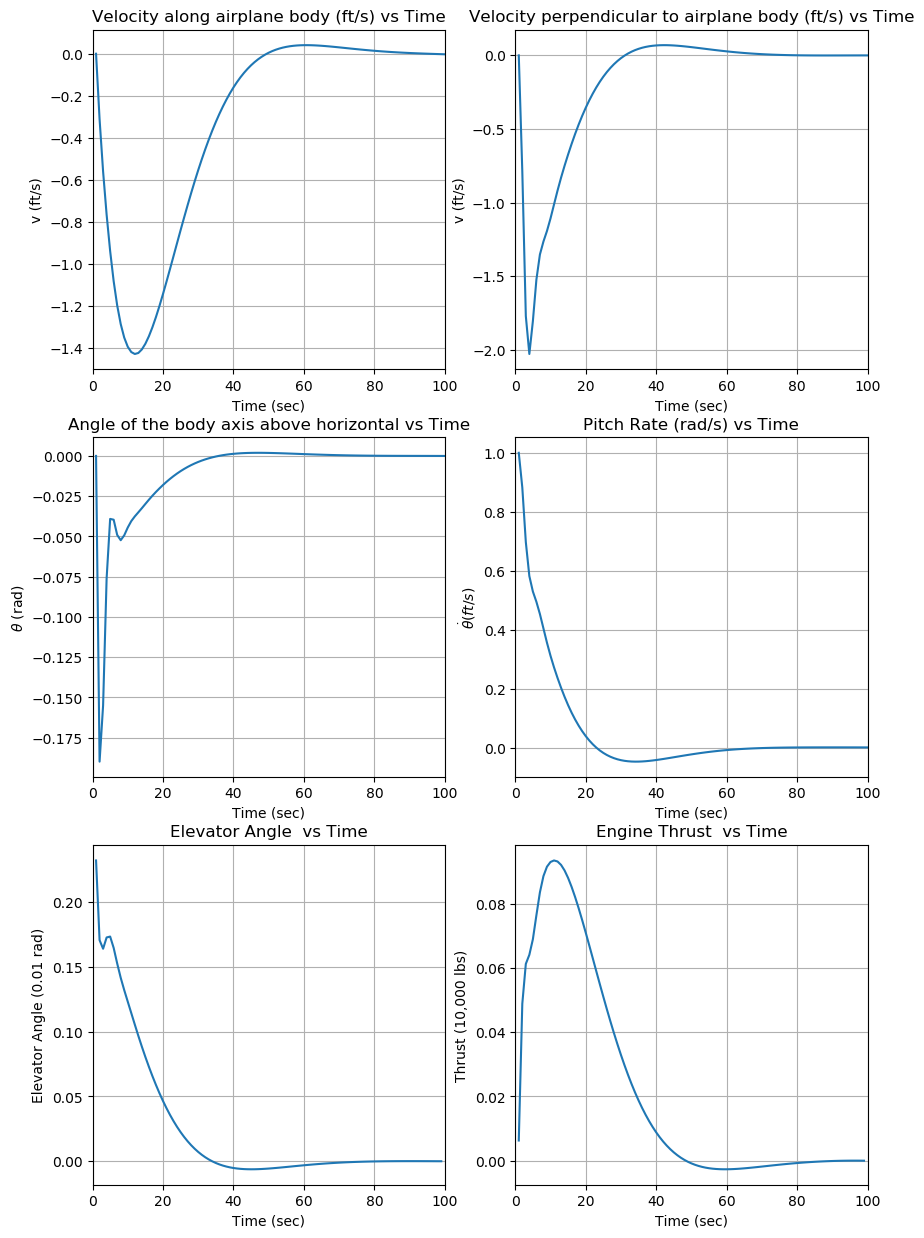

In [9]:
figure(figsize=(10,15))
subplot(321)
plot(1:T, x_ls[1,:]) 
title("Velocity along airplane body (ft/s) vs Time");
xlabel("Time (sec)");
ylabel("v (ft/s)");
grid(true);
xlim([0,T]);


subplot(322)
plot(1:T, x_ls[2, :]) #[2:n:end,1])
title("Velocity perpendicular to airplane body (ft/s) vs Time");
xlabel("Time (sec)");
ylabel("v (ft/s)");
grid(true);
xlim([0,T]);


subplot(323)
plot(1:T, x_ls[3, :]) #:n:end,1])
title("Angle of the body axis above horizontal vs Time");
xlabel("Time (sec)");
ylabel(L"$\theta$ (rad)");
grid(true);
xlim([0,T]);


subplot(324)
plot(1:T, x_ls[4, :]) #:n:end,1])
title("Pitch Rate (rad/s) vs Time");
xlabel("Time (sec)");
ylabel(L"\dot{\theta}(ft/s)");
grid(true);
xlim([0,T]);


subplot(325)
plot(1:(T-1), u_ls[1,:]) #:m:end,1])
title("Elevator Angle  vs Time");
xlabel("Time (sec)");
ylabel("Elevator Angle (0.01 rad)");
grid(true);
xlim([0,T]);


subplot(326)
plot(1:(T-1), u_ls[2,:]) #:m:end,1])
title("Engine Thrust  vs Time");
xlabel("Time (sec)");
ylabel("Thrust (10,000 lbs)");
grid(true, which="major");

xlim([0,T]);

## Part C ##

Find a state feedback matrix $K$ used to feed the state back into the input. Specifically, the input is given by $u_t = Kx_{t-1}$. 

In [10]:
T1 = 100;
rho1 = 100.0;
C = Matrix{Float64}(I, n, n);

In [11]:
K1 = zeros(m, n);

for i in 1:n
    xinit = vec(zeros(n));
    xinit[i] = 1.0;
    
    Atilde, btilde, Ctilde, dtilde = lqr_matrix(A, B, C, vec(xinit), T1, rho1);
    u_offset = T1 * n;
    x_ls = constrained_least_squares(Atilde, btilde, Ctilde, dtilde);  # This should be solved by factorizing the 
    K1[:,i] = x_ls[u_offset+1:u_offset+m];                             # kkt matrix and caching it but this problem 
                                                                       # is small so perf isn't an issue                                                       
end

In [12]:
T2 = 50;
rho2 = 100.0;
C = Matrix{Float64}(I, n, n);

In [13]:
K2 = zeros(m, n);

for i in 1:n
    xinit = vec(zeros(n));
    xinit[i] = 1.0;
    
    Atilde, btilde, Ctilde, dtilde = lqr_matrix(A, B, C, xinit, T2, rho2);
    u_offset = T2 * n;
    x_ls = constrained_least_squares(Atilde, btilde, Ctilde, dtilde);  # This should be solved by factorizing the 
    K2[:,i] = x_ls[u_offset+1:u_offset+m];                             # kkt matrix and caching it but this problem 
                                                                       # is small so perf isn't an issue                                                          
end

In [14]:
err = round(norm(K1 - K2), sigdigits=4);
println("The norm of the difference between state feedback with 50 and 100 times samples is $err")

The norm of the difference between state feedback with 50 and 100 times samples is 0.0005431


For $T=100$ and $T=50$, we see that the sate feedback matrices $K_1$ and $K_2$ matrices are roughly the same

# Part D #

In [15]:
T = 120;
rho = 100.0;
C = Matrix{Float64}(I, n, n);
xinit = [0.0;0;0;1.0];

In [16]:
states, state_feedback_inputs = propagate_linear_dyanmical_system_with_state_feedback(A, B, K1, T, xinit);


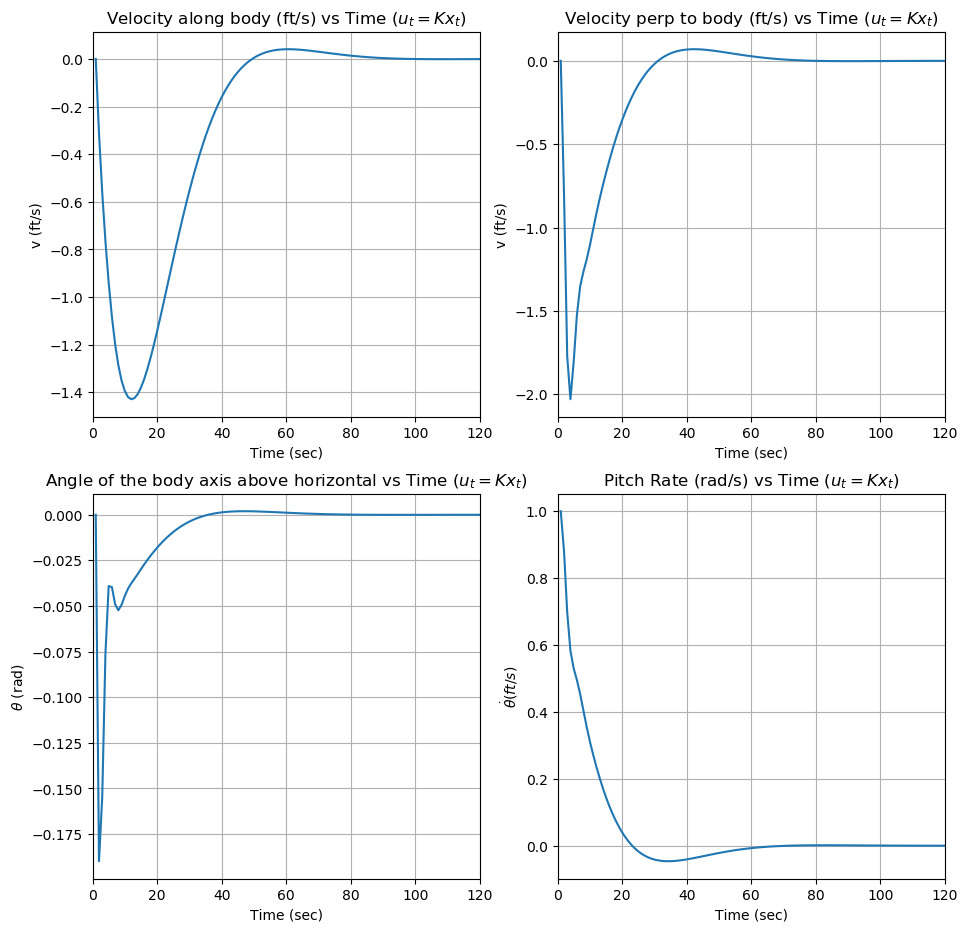

In [17]:
figure(figsize=(11,11))
subplot(221)
plot(1:T, states[1,:])
title(L"Velocity along body (ft/s) vs Time ($u_t=Kx_t$)");
xlabel("Time (sec)");
ylabel("v (ft/s)");
grid(true);
xlim([0,T]);


subplot(222)
plot(1:T, states[2,:])
title(L"Velocity perp to body (ft/s) vs Time ($u_t=Kx_t$)");
xlabel("Time (sec)");
ylabel("v (ft/s)");
grid(true);
xlim([0,T]);


subplot(223)
plot(1:T, states[3,:])
title(L"Angle of the body axis above horizontal vs Time ($u_t=Kx_t$)");
xlabel("Time (sec)");
ylabel(L"$\theta$ (rad)");
grid(true);
xlim([0,T]);


subplot(224)
plot(1:T, states[4,:])
title(L"Pitch Rate (rad/s) vs Time ($u_t=Kx_t$)");
xlabel("Time (sec)");
ylabel(L"\dot{\theta}(ft/s)");
grid(true);
xlim([0,T]);

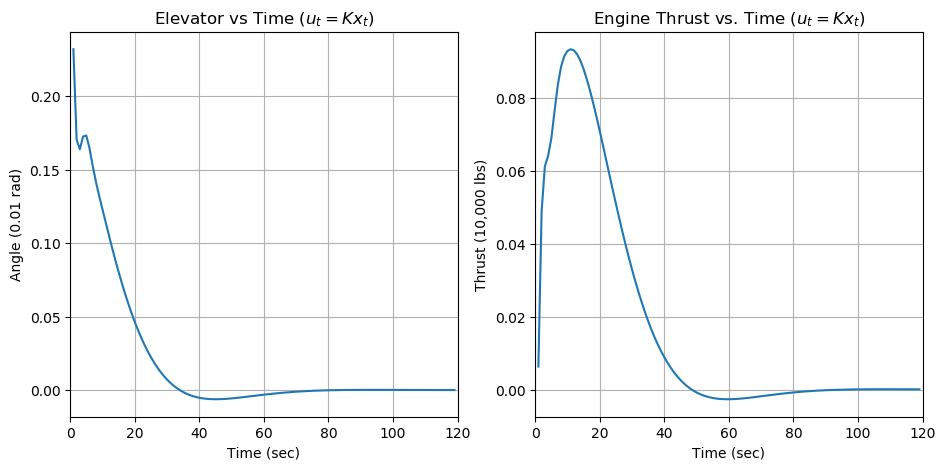

In [18]:
figure(figsize=(11,11))

subplot(221)
plot(1:T-1, state_feedback_inputs[1,:])
title(L"Elevator vs Time ($u_t=Kx_t$)");
xlabel("Time (sec)");
ylabel("Angle (0.01 rad)");
grid(true);
xlim([0,T]);


subplot(222)
plot(1:T-1, state_feedback_inputs[2,:])
title(L"Engine Thrust vs. Time ($u_t=Kx_t$)");
xlabel("Time (sec)");
ylabel("Thrust (10,000 lbs)");
grid(true);
xlim([0,T]);

# Problem 17.7 #

Given a bio-mass reactor with three bacteria populations and taking measurements at each time $t$ we have the following linear dynamical system

\begin{align*}
    x_{t+1} &= 
    \begin{bmatrix}
    1+r_1 & 0 & 0\\
    0 & 1+r_2 & 0\\
    0 & 0 & 1+r_3
    \end{bmatrix}x_t + w_t\\[6pt]
    y_t &= \begin{bmatrix} 1 & 1 & 1\end{bmatrix}x_{t} + v_t
\end{align*}

This problem is then just a typical state estimation problem with variables $(x_1,x_2,\ldots,x_T,w_1,w_2,\ldots,w_{T-1})$